In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error



In [4]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# Rename columns for easier handling
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
                'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Distribution',
                'Heating_Load', 'Cooling_Load']

# Check for missing values
print(data.isnull().sum())



Relative_Compactness    0
Surface_Area            0
Wall_Area               0
Roof_Area               0
Overall_Height          0
Orientation             0
Glazing_Area            0
Glazing_Distribution    0
Heating_Load            0
Cooling_Load            0
dtype: int64


In [5]:
# Correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix['Heating_Load'])



Relative_Compactness    0.622272
Surface_Area           -0.658120
Wall_Area               0.455671
Roof_Area              -0.861828
Overall_Height          0.889430
Orientation            -0.002587
Glazing_Area            0.269842
Glazing_Distribution    0.087368
Heating_Load            1.000000
Cooling_Load            0.975862
Name: Heating_Load, dtype: float64


In [6]:
# Data Splitting
X = data.iloc[:, :-2]  # Features
y = data['Heating_Load']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Train Linear Regression (Manual)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term
theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)



In [8]:
# Predict using manual model
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_manual = X_test_b.dot(theta)



In [9]:
# Train models using sklearn
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



In [10]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)



In [11]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)



In [12]:
#  Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - R2 Score: {r2:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    return r2, mse, rmse

evaluate_model(y_test, y_pred_manual, "Manual Linear Regression")
evaluate_model(y_test, y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")



Manual Linear Regression - R2 Score: -292.85, MSE: 30628.52, RMSE: 175.01
Sklearn Linear Regression - R2 Score: 0.91, MSE: 9.15, RMSE: 3.03
Ridge Regression - R2 Score: 0.91, MSE: 9.65, RMSE: 3.11
Lasso Regression - R2 Score: 0.90, MSE: 10.09, RMSE: 3.18


(0.9032061783960789, 10.089053229372837, 3.176327002903328)

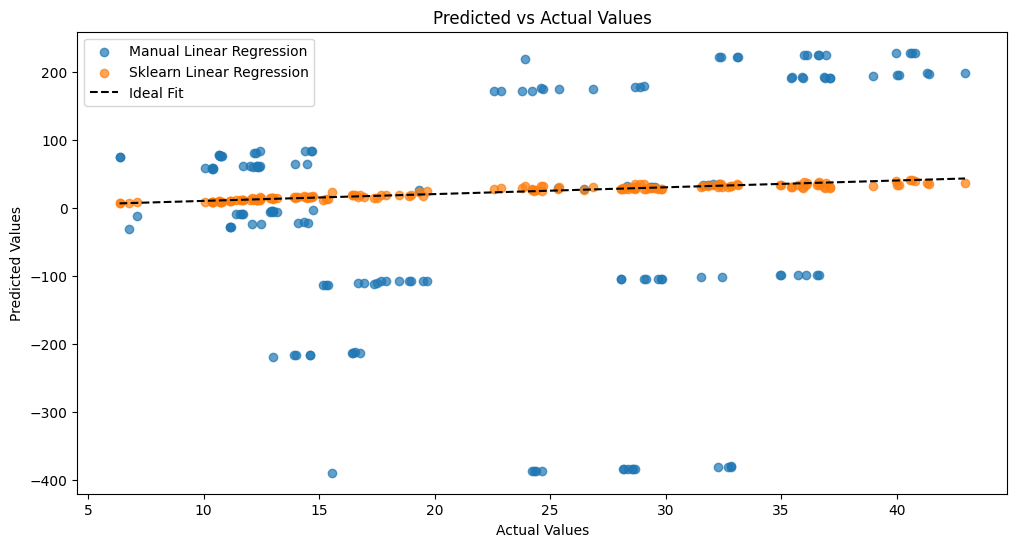

In [13]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_manual, label="Manual Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_lr, label="Sklearn Linear Regression", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()

In [14]:
# Insights and Suggestions
print("Insights:")
print("- Features like Relative_Compactness and Surface_Area have high correlation with Heating Load.")
print("- Improving insulation (Wall_Area and Roof_Area) and optimizing glazing areas can reduce heating loads.")
print("- Buildings with better orientation and compactness are more energy-efficient.")

Insights:
- Features like Relative_Compactness and Surface_Area have high correlation with Heating Load.
- Improving insulation (Wall_Area and Roof_Area) and optimizing glazing areas can reduce heating loads.
- Buildings with better orientation and compactness are more energy-efficient.
